In [100]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
import numpy as np

%matplotlib inline

In [101]:
# load data
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

print(train_set.info())
print(test_set.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB
None
<class 'pandas

In [102]:
train_set.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [103]:
test_set.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15035,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
1,15036,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,15037,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
3,15038,20150415T000000,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
4,15039,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [104]:
# Correlation before normalizing target variable
all_set[all_set['price']>0].corr(method='pearson')['price'].sort_values(ascending=False)

price             1.000000
sqft_living       0.702899
grade             0.667211
bathrooms         0.525479
view              0.400806
bedrooms          0.323672
lat               0.301604
waterfront        0.265738
floors            0.243731
living_greater    0.227226
with_basement     0.176706
renovated         0.140550
sqft_lot          0.096793
lot_greater       0.063211
with_garret       0.048364
yr_built          0.047290
condition         0.039740
season_spring     0.026180
long              0.023547
id                0.020899
year              0.008012
season_summer     0.004932
season_fall      -0.014863
zipcode          -0.051498
Name: price, dtype: float64

mu:  540682.6531426671  std:  371524.6603903912


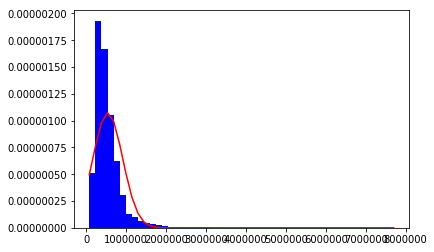

In [105]:
# histogram of target variable before normalization
mu = train_set.price.mean()
std = train_set.price.std()
print('mu: ', mu, ' std: ',std)

n, bins, patches = plt.hist(train_set.price, 50, density=1, color='blue')
y = scipy.stats.norm.pdf(bins, mu, std)
plt.plot(bins, y, 'r-')
plt.show()

mu:  13.048119847342958  std:  0.5274545441516205


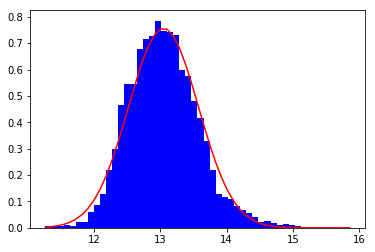

In [106]:
# normalize target variable
price_log = np.log(train_set.price)
price_log_mu = np.mean(price_log)
price_log_std = np.std(price_log)
print('mu: ', price_log_mu, ' std: ',price_log_std)


n, bins, patches = plt.hist(price_log, 50, density=1, color='blue')
y= scipy.stats.norm.pdf(bins, price_log_mu, price_log_std)
plt.plot(bins, y, 'r-')
plt.show()


In [107]:
# replacing train_set.price with log-transformed price
original_price = train_set.price.copy()
train_set.price = price_log

In [108]:
# Combine train and test set
all_set = pd.concat([train_set, test_set])

C:\Users\donny\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [111]:
all_set.price

0       12.309982
1       12.100712
2       13.142166
3       12.458775
4       12.583995
5       13.403776
6       13.056224
7       12.644328
8       12.899220
9       13.180632
10      13.384728
11      12.886641
12      13.091904
13      12.149502
14      12.345835
15      12.860999
16      14.508658
17      12.439958
18      12.703813
19      12.358794
20      13.750439
21      13.410545
22      13.271645
23      13.440817
24      13.190022
25      12.683858
26      13.453105
27      13.369223
28      12.388394
29      13.312984
          ...    
6438          NaN
6439          NaN
6440          NaN
6441          NaN
6442          NaN
6443          NaN
6444          NaN
6445          NaN
6446          NaN
6447          NaN
6448          NaN
6449          NaN
6450          NaN
6451          NaN
6452          NaN
6453          NaN
6454          NaN
6455          NaN
6456          NaN
6457          NaN
6458          NaN
6459          NaN
6460          NaN
6461          NaN
6462      

In [112]:
# Correlation before normalizing target variable
all_set[all_set['price']>0].corr(method='pearson')['price'].sort_values(ascending=False)

price            1.000000
grade            0.707412
sqft_living      0.697907
sqft_living15    0.621800
sqft_above       0.607197
bathrooms        0.552000
lat              0.444417
bedrooms         0.359946
view             0.347505
floors           0.317810
sqft_basement    0.314378
waterfront       0.172580
yr_renovated     0.127533
sqft_lot         0.108946
sqft_lot15       0.096976
yr_built         0.076294
long             0.054362
condition        0.042947
id               0.035940
zipcode         -0.039195
Name: price, dtype: float64

In [113]:
# check if there is any null values
print(all_set.isnull().sum(), '\n -----------data types------------\n',all_set.dtypes)

bathrooms           0
bedrooms            0
condition           0
date                0
floors              0
grade               0
id                  0
lat                 0
long                0
price            6468
sqft_above          0
sqft_basement       0
sqft_living         0
sqft_living15       0
sqft_lot            0
sqft_lot15          0
view                0
waterfront          0
yr_built            0
yr_renovated        0
zipcode             0
dtype: int64 
 -----------data types------------
 bathrooms        float64
bedrooms           int64
condition          int64
date              object
floors           float64
grade              int64
id                 int64
lat              float64
long             float64
price            float64
sqft_above         int64
sqft_basement      int64
sqft_living        int64
sqft_living15      int64
sqft_lot           int64
sqft_lot15         int64
view               int64
waterfront         int64
yr_built           int64
yr_renovated 

In [115]:
# Change text feature to numerical value
# slice date column to extract year and month
all_set['year']= all_set.date.astype('str').str.slice(0, 4).astype('int')
all_set['month']= all_set.date.astype('str').str.slice(4,6).astype('int')
all_set[['year','month']].head(10)

,year,month
0,2014,10
1,2015,2
2,2015,2
3,2014,6
4,2015,1
5,2015,4
6,2014,5
7,2014,5
8,2014,10
9,2015,3


In [116]:
# Correlation after normalizing target variable
all_set[all_set['price']>0].corr(method='pearson').price.sort_values(ascending=False)

price            1.000000
grade            0.707412
sqft_living      0.697907
sqft_living15    0.621800
sqft_above       0.607197
bathrooms        0.552000
lat              0.444417
bedrooms         0.359946
view             0.347505
floors           0.317810
sqft_basement    0.314378
waterfront       0.172580
yr_renovated     0.127533
sqft_lot         0.108946
sqft_lot15       0.096976
yr_built         0.076294
long             0.054362
condition        0.042947
id               0.035940
year             0.009913
month           -0.013975
zipcode         -0.039195
Name: price, dtype: float64

In [117]:
'''Add feature with_basement
if sqft_basement > 0 -> 1, otherwise 0'''
# sqft_living = sqft_above + sqft_basement
# 1: with basement, 0: no basement
all_set['with_basement'] = np.select([all_set['sqft_basement'] > 0], [1], default=0)
all_set['with_basement'].value_counts()

0    13056
1     8447
Name: with_basement, dtype: int64

In [119]:
'''Add feature with_garret
if floors are not int, it means the house has a garret at the top.'''
# 1: with garret, 0: no garret

all_set['with_garret'] = np.select([all_set.floors.astype('str').str.slice(2,3) == '5'], [1], default = 0)
all_set['floors'] = all_set['floors'].astype('str').str.slice(0,1).astype('int')
print(all_set.floors.value_counts())
print(all_set.with_garret.value_counts())


1    12507
2     8377
3      619
Name: floors, dtype: int64
0    21503
Name: with_garret, dtype: int64


In [120]:
'''
Add feature season out of month
spring: 3,4,5
summer: 6,7,8
fall: 9,10,11
winter: 12,1,2
'''
conditions = [(all_set['month']>=3) & (all_set['month'] <=5),
             (all_set['month']>=6) & (all_set['month'] <=8),
             (all_set['month']>=9) & (all_set['month'] <=11)]
choices = ['spring','summer','fall']
all_set['season'] = np.select(conditions, choices, default = 'winter')

In [121]:
all_set.season.value_counts()

spring    6458
summer    6328
fall      5055
winter    3662
Name: season, dtype: int64

In [122]:
# change season to categorical data
all_set = pd.get_dummies(all_set, prefix_sep="_", columns=['season'])

#drop a column to avoid dummy variable trap
all_set.drop('season_winter', axis=1, inplace=True)

In [123]:
all_set.head()

,bathrooms,bedrooms,condition,date,floors,grade,id,lat,long,price,...,yr_built,yr_renovated,zipcode,year,month,with_basement,with_garret,season_fall,season_spring,season_summer
0,1.00,3,3,20141013T000000,1,7,0,47.5112,-122.257,12.309982,...,1955,0,98178,2014,10,0,0,1,0,0
1,1.00,2,3,20150225T000000,1,6,1,47.7379,-122.233,12.100712,...,1933,0,98028,2015,2,0,0,0,0,0
2,2.00,3,3,20150218T000000,1,8,2,47.6168,-122.045,13.142166,...,1987,0,98074,2015,2,0,0,0,0,0
3,2.25,3,3,20140627T000000,2,7,3,47.3097,-122.327,12.458775,...,1995,0,98003,2014,6,0,0,0,0,1
4,1.50,3,3,20150115T000000,1,7,4,47.4095,-122.315,12.583995,...,1963,0,98198,2015,1,0,0,0,0,0


In [124]:
# add feature (renovated)
all_set['renovated'] = np.select([all_set['yr_renovated'] > 0], [1], default=0)
all_set['renovated'].value_counts()

0    20590
1      913
Name: renovated, dtype: int64

In [125]:
# add feature (living_greater) after comparing sqft_living and sqft_living15
all_set['living_greater'] = np.select([all_set['sqft_living'] > all_set['sqft_living15']], [1], default=0)
all_set['living_greater'].value_counts()

0    11700
1     9803
Name: living_greater, dtype: int64

In [126]:
# add feature (lot_greater) after comparing sqft_lot and sqft_lot15
all_set['lot_greater'] = np.select([all_set['sqft_lot'] > all_set['sqft_lot15']], [1], default=0)
all_set['lot_greater'].value_counts()

0    12953
1     8550
Name: lot_greater, dtype: int64

Drop columns from all_set: sqft_above, sqft_basement, date, yr_renovated, sqft_living15, sqft_lot15, month

In [127]:
all_set.drop(['yr_renovated', 'sqft_above','sqft_basement','date','sqft_living15','sqft_lot15','month'], axis=1, inplace=True)

In [128]:
all_set[all_set['price']>0].corr(method='pearson').price.sort_values(ascending=False)

price             1.000000
grade             0.707412
sqft_living       0.697907
bathrooms         0.552000
lat               0.444417
bedrooms          0.359946
view              0.347505
floors            0.294176
living_greater    0.257205
with_basement     0.207726
waterfront        0.172580
renovated         0.127241
sqft_lot          0.108946
yr_built          0.076294
lot_greater       0.057863
long              0.054362
condition         0.042947
id                0.035940
season_spring     0.035914
season_summer     0.009998
year              0.009913
season_fall      -0.022199
zipcode          -0.039195
with_garret            NaN
Name: price, dtype: float64

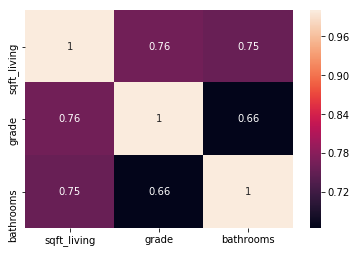

In [129]:
corr = all_set[['sqft_living', 'grade', 'bathrooms']].corr()
sns.heatmap(corr, annot=True)

In [130]:
# Train set and Test set
train_set = all_set.iloc[:len(train_set),:]
test_set = all_set.iloc[len(train_set):, :]

print("Train set:", train_set.shape, "\n Test set:", test_set.shape)

Train set: (15035, 24) 
 Test set: (6468, 24)


In [133]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(
                train_set.drop(['id','price'],axis=1).values, i) for i in range(train_set.drop(['id','price'], axis=1).shape[1])]
vif['features'] = train_set.drop(['id', 'price'],axis=1).columns

print(vif.sort_values(by='VIF_Factor', ascending=False))

      VIF_Factor        features
12  5.204743e+06         zipcode
13  4.094070e+06            year
6   1.333747e+06            long
5   1.397681e+05             lat
11  1.161546e+04        yr_built
4   1.358691e+02           grade
2   3.586580e+01       condition
7   3.092077e+01     sqft_living
0   2.939532e+01       bathrooms
1   2.589757e+01        bedrooms
3   1.677963e+01          floors
18  2.868265e+00   season_summer
17  2.790161e+00   season_spring
20  2.694331e+00  living_greater
16  2.483045e+00     season_fall
14  2.345012e+00   with_basement
21  1.738922e+00     lot_greater
9   1.501848e+00            view
8   1.261369e+00        sqft_lot
19  1.201183e+00       renovated
10  1.200225e+00      waterfront
15           NaN     with_garret


In [134]:
# #Based on VIF, drop zipcode, long, lat
train_set.drop(['zipcode','long','lat','year','yr_built'], axis=1, inplace=True)
test_set.drop(['zipcode','long','lat','year','yr_built'], axis=1, inplace=True)
print('Train set: ', train_set.shape, '\n Test set: ', test_set.shape)

Train set:  (15035, 19) 
 Test set:  (6468, 19)


C:\Users\donny\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [135]:
y_train = train_set.price.copy()
test_id = test_set.id
x_train = train_set.drop(['id', 'price'], axis=1).copy()
x_test = test_set.drop(['id','price'], axis=1).copy()

In [136]:
print(y_train)

0        12.309982
1        12.100712
2        13.142166
3        12.458775
4        12.583995
5        13.403776
6        13.056224
7        12.644328
8        12.899220
9        13.180632
10       13.384728
11       12.886641
12       13.091904
13       12.149502
14       12.345835
15       12.860999
16       14.508658
17       12.439958
18       12.703813
19       12.358794
20       13.750439
21       13.410545
22       13.271645
23       13.440817
24       13.190022
25       12.683858
26       13.453105
27       13.369223
28       12.388394
29       13.312984
           ...    
15005    12.706848
15006    13.318752
15007    13.573439
15008    13.322770
15009    12.899095
15010    13.269058
15011    12.800780
15012    13.377006
15013    13.296091
15014    13.102161
15015    12.899095
15016    12.506177
15017    13.132314
15018    12.860999
15019    12.934828
15020    12.758520
15021    14.016409
15022    13.899852
15023    12.765688
15024    13.429775
15025    14.269766
15026    13.

In [137]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train_df = pd.DataFrame(sc_x.fit_transform(x_train), columns=x_train.columns)


C:\Users\donny\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\donny\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [138]:
x_test_df = pd.DataFrame(sc_x.transform(x_test), columns=x_test.columns)


C:\Users\donny\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [139]:
# Multiple Regression
import statsmodels.api as sm
y = train_set.price.copy()
x = x_train_df.copy()
x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1496.
Date:                Fri, 29 Mar 2019   Prob (F-statistic):               0.00
Time:                        20:53:57   Log-Likelihood:                -4549.8
No. Observations:               15035   AIC:                             9134.
Df Residuals:                   15018   BIC:                             9263.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.0481      0.003   4882.780      0.000      13.043      13.053
bathrooms         -0.0151      0.005     -3.223      0.001      -0.024      -0.006
bedrooms          -0.0119      0.004     -3.400      0.001      -0.019      -0.005
condition          0.0642      0.003     22.656      0.000       0.059       0.070
floors             0.0196      0.004      5.370      0.000       0.012       0.027
grade              0.2334      0.005     50.759      0.000       0.224       0.242
sqft_living        0.1841      0.006     31.407      0.000       0.173       0.196
sqft_lot          -0.0018      0.003     -0.666      0.505      -0.007       0.004
view               0.0512      0.003     16.606      0.000       0.045       0.057
waterfront         0.0248      0.003      8.495      0.000       0.019       0.030
with_basement      0.0556      0.003     18.175      0.000       0.050       0.062
with_garret     1.004e-15   3.06e-17     32.854      0.000    9.44e-16    1.06e-15
season_fall        0.0057      0.004      1.575      0.115      -0.001       0.013
season_spring      0.0274      0.004      7.344      0.000       0.020       0.035
season_summer      0.0101      0.004      2.702      0.007       0.003       0.017
renovated          0.0433      0.003     15.973      0.000       0.038       0.049
living_greater    -0.0185      0.003     -5.756      0.000      -0.025      -0.012
lot_greater       -0.0077      0.003     -2.806      0.005      -0.013      -0.002
==============================================================================
Omnibus:                        0.580   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.748   Jarque-Bera (JB):                0.551
Skew:                           0.009   Prob(JB):                        0.759
Kurtosis:                       3.024   Cond. No.                     1.88e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Drop features with high p value
x_train_df.drop('floors', axis=1, inplace=True)
x_test_df.drop('floors', axis=1, inplace=True)

# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel= 'rbf')
x_train_kpca = kpca.fit_transform(x_train_df)
x_test_kpca = kpca.transform(x_test_df)

print(x_train_kpca)

In [141]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
x_train_pca = pca.fit_transform(x_train_df)
x_test_pca = pca.transform(x_test_df)
print(pca.explained_variance_ratio_)


[0.22078432 0.10085613 0.08983705 0.08528192 0.08317893 0.07189664
 0.06160934 0.05342162 0.05031122 0.0447655 ]


In [142]:
sum(pca.explained_variance_ratio_[0:10])


0.8619426699671541

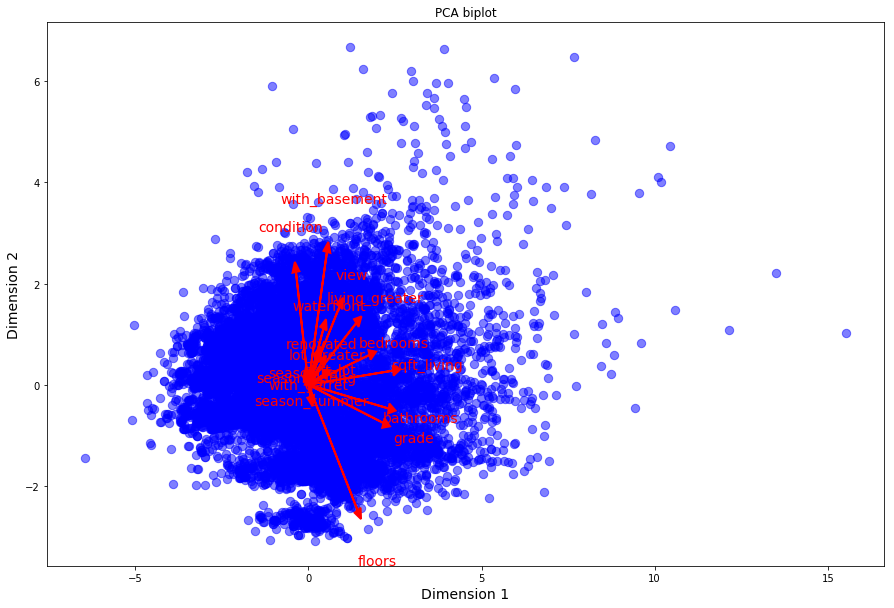

In [143]:
# PCA biplot
pca = PCA(n_components=2).fit(x_train_df)
reduced_data = pca.transform(x_train_df)
pca.samples = pca.transform(x_train_df)
reduced_data = pd.DataFrame(reduced_data, columns=['Dimension1', 'Dimension2'])

def biplot(data, reduced_data, pca):
    fig, ax = plt.subplots(figsize = (15,10))
    
    # scatter plot of reduced data
    ax.scatter(x=reduced_data.loc[:,'Dimension1'], y=reduced_data.loc[:,'Dimension2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T
    
    # using scaling factors to make arrows
    arrow_size, text_pos = 5.0, 7.0,
    
    for i, v in enumerate(feature_vectors):
        ax.arrow(0,0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, x_train_df.columns[i], color='red', ha='center', va='center', fontsize=14)
        
    ax.set_xlabel('Dimension 1', fontsize=14)
    ax.set_ylabel('Dimension 2', fontsize=14)
    ax.set_title('PCA biplot')
    
    return ax

biplot(x_train, reduced_data, pca)

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [145]:
# Split train and test set from train
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(x_train_pca, y_train, test_size=0.2, random_state=0)


In [146]:
y_train_set.shape

(12028,)

In [147]:
x_train_set.shape

(12028, 10)

at  1  :  0.45194962001149375
at  3  :  0.38172652421156783
at  5  :  0.36302780370505144
at  7  :  0.35688725443165825
at  9  :  0.35618419031570353


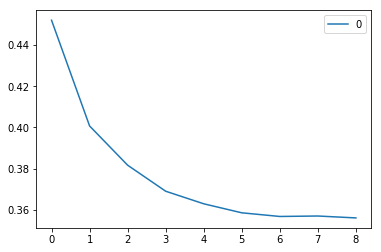

In [148]:
# Knn Regresssor
# find the best number of k
rmse = []
for k in range(1,10):
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(x_train_set, y_train_set.values)
    y_pred = knn_regressor.predict(x_test_set)
    error = sqrt(mean_squared_error(y_test_set, y_pred))
    rmse.append(error)
    if k%2 == 1:
        print('at ', k, ' : ', error)
    
graph = pd.DataFrame(rmse)
graph.plot()


In [149]:
knn_reg = KNeighborsRegressor(n_neighbors=9)
knn_reg.fit(x_train_set, y_train_set.values)
y_pred = knn_reg.predict(x_test_set)
error = sqrt(mean_squared_error(y_test_set, y_pred))
print(error)


0.35618419031570353


In [153]:
# Applying k-Fold Cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=knn_reg, X = x_train_set, y=y_train_set, cv=10)

print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.55832322 0.529666   0.51584938 0.54795231 0.53918086 0.50573446
 0.53079151 0.55328373 0.5621161  0.52232773]
0.5365225299681344
0.01790413030728324


In [154]:
# Decision Tree Regressor
dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train_set, y_train_set)
y_pred = dec_tree.predict(x_test_set)
error = sqrt(mean_squared_error(y_test_set, y_pred))
print(error)

0.4656533974028883


In [155]:
# Applying k-Fold Cross validation
accuracies = cross_val_score(estimator=dec_tree, X = x_train_set, y=y_train_set, cv=10)

print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.21282415 0.20350706 0.08347937 0.21282459 0.22140169 0.19497634
 0.19965757 0.23471209 0.30480139 0.23873203]
0.21069162702278862
0.051910493192867634


In [156]:
# Random Forest
rd_forest = RandomForestRegressor(n_estimators=100)
rd_forest.fit(x_train_set, y_train_set)
y_pred = rd_forest.predict(x_test_set)
error = sqrt(mean_squared_error(y_test_set, y_pred))
print(error)

0.34077595706753294


In [157]:
# Applying k-Fold Cross validation
accuracies = cross_val_score(estimator=rd_forest, X = x_train_set, y=y_train_set, cv=10)

print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.58484268 0.5710023  0.5527362  0.59917063 0.56922062 0.56264326
 0.56698475 0.57833249 0.60385486 0.55522079]
0.5744008575115479
0.016353672789794677


In [158]:
test_id.shape

(6468,)

In [159]:
y_pred.shape

(3007,)

In [96]:
submission = pd.DataFrame({
                           'id': test_id,
                           'price': y_pred
                           })
submission.to_csv('submission.csv', index=False)

ValueError: array length 3007 does not match index length 6468